**O Processamento de Linguagem Natural (PLN)**, é uma área da inteligência artificial (IA) que se concentra na interação entre computadores e linguagem humana. O objetivo do PLN é capacitar os computadores a compreender, interpretar e até mesmo gerar linguagem humana de forma natural.

O PLN envolve uma variedade de tarefas, incluindo:

- **Tokenização**: Dividir o texto em unidades significativas, como palavras ou frases.
- **Análise Morfológica**: Identificar a estrutura gramatical das palavras, - - incluindo raízes, sufixos, prefixos, etc.
- **Análise Sintática:** Analisar a estrutura sintática das sentenças para entender a relação entre as palavras.
- **Análise Semântica:** Compreender o significado das palavras e das sentenças em um contexto específico.
- **Reconhecimento de Entidades Nomeadas (NER):** Identificar e classificar entidades mencionadas no texto, como nomes de pessoas, locais, datas, etc.
- **Classificação de Texto:** Atribuir categorias ou rótulos a textos com base em seu conteúdo, como análise de sentimentos, detecção de spam, etc.
- **Tradução Automática:** Traduzir texto de uma língua para outra de forma automática.
- **Geração de Texto:** Criar texto humano-like a partir de dados estruturados ou modelos de linguagem.

O PLN é uma área de pesquisa ativa e é aplicada em uma variedade de aplicações do mundo real, incluindo sistemas de recomendação, assistentes virtuais, chatbots, análise de sentimentos em mídias sociais, tradução automática, análise de texto jurídico, entre outros. Ele desempenha um papel fundamental na capacitação dos sistemas de computador a entender e interagir com os humanos de maneira mais eficaz e natural.


In [ ]:
import bs4 as bs
import urllib.request
import nltk
import spacy

In [ ]:
!python3 -m spacy download pt

⚠ As of spaCy v3.0, shortcuts like 'pt' are deprecated. Please use the
full pipeline package name 'pt_core_news_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 67.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


##Marcação POS
- POS (part of speech) atribui partes da fala
- Importante para detecção de entidades no texto, pois primeiro é necessário saber o que o texto contém

In [ ]:
nlp = spacy.load('pt_core_news_sm')
nlp

In [ ]:
documento = nlp('Estou aprendendo processamento de linguagem natural em Brasilia')

In [ ]:
type(documento)

spacy.tokens.doc.Doc

In [ ]:
for token in documento:
  print(token.text, token.pos_)

Estou AUX
aprendendo VERB
processamento NOUN
de ADP
linguagem NOUN
natural ADJ
em ADP
Brasilia PROPN


##Lematização e stemização
- Lematização extrai o verbo
- Stemização extrai o radical

In [ ]:
for token in documento:
  print(token.text, token.lemma_)

Estou estar
aprendendo aprender
processamento processamento
de de
linguagem linguagem
natural natural
em em
Brasilia Brasilia


In [ ]:
doc = nlp("encontrei encontraram encontrarão encontrariam cursando cursei cursado")
[token.lemma_ for token in doc]

['encontrar',
 'encontrar',
 'encontrar',
 'encontrar',
 'cursar',
 'cursei',
 'cursar']

In [ ]:
import nltk
nltk.download('rslp')

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [ ]:
stemmer = nltk.stem.RSLPStemmer()
stemmer.stem('aprender')

'aprend'

In [ ]:
for token in documento:
  print(token.text, token.lemma_, stemmer.stem(token.text))

Estou estar est
aprendendo aprender aprend
processamento processamento process
de de de
linguagem linguagem lingu
natural natural natur
em em em
Brasilia Brasilia brasil


##Carregamento dos textos

In [ ]:
dados = urllib.request.urlopen('https://pt.wikipedia.org/wiki/Intelig%C3%AAncia_artificial')

In [ ]:
dados= dados.read()
dados

b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-feature-night-mode-disabled skin-theme-clientpref-day vector-toc-available" lang="pt" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Intelig\xc3\xaancia artificial \xe2\x80\x93 Wikip\xc3\xa9dia, a enciclop\xc3\xa9dia livre</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-

In [ ]:
dados_html = bs.BeautifulSoup(dados, 'lxml') #algoritmo que lê arquivos html
dados_html

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-feature-night-mode-disabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="pt">
<head>
<meta charset="utf-8"/>
<title>Inteligência artificial – Wikipédia, a enciclopédia livre</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-mai

In [ ]:
paragrafos = dados_html.find_all('p') #procurando as tags 'p' que são as tags que correspodem a textos
len(paragrafos)

64

- Extraindo o texto completo

In [ ]:
conteudo = ''
for p in paragrafos:
  conteudo += p.text

In [ ]:
conteudo

'A inteligência artificial (de sigla: IA; do inglês: artificial intelligence, de sigla: AI) é um campo de estudo multidisciplinar que abrange varias áreas do conhecimento.[1][2] É também um conjunto de novas tecnologias que permitem aos aparelhos smart executarem várias funções avançadas de modo quase autônomo,[2][3] representanto um marco histórico na computação moderna.[3] Embora seu desenvolvimento tenha avançado mais na ciência da computação, sua abordagem interdisciplinar envolve contribuições de diversas disciplina.\nAlgumas das principais áreas relacionadas à IA incluem:\nÉ difícil definir especificamente a Inteligência Artificial, mas ao longo do tempo seguiu essas quatro linhas de pensamento:[1]\nÉ um conceito amplo e que recebe tantas definições quanto significados diferentes à palavra inteligência.[4] É possível considerar algumas características básicas desses sistemas, como a capacidade de raciocínio (aplicar regras lógicas a um conjunto de dados disponíveis para chegar a 

- Transformando todos os caracteres em minúsculos

In [ ]:
conteudo = conteudo.lower()

##Buscas em textos com spaCy

In [ ]:
nlp = spacy.load('pt_core_news_sm')
nlp

- Buscando a palavra 'turing'

In [ ]:
string = 'turing'
token_pesquisa = nlp(string)

- Algoritmo para busca de caracteres

In [ ]:
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(nlp.vocab)
matcher.add('SEARCH', None, token_pesquisa)

In [ ]:
doc = nlp(conteudo)
matches = matcher(doc)
matches

[(8661325627334373315, 3463, 3464),
 (8661325627334373315, 3473, 3474),
 (8661325627334373315, 3629, 3630),
 (8661325627334373315, 3634, 3635),
 (8661325627334373315, 3640, 3641),
 (8661325627334373315, 3703, 3704),
 (8661325627334373315, 4356, 4357),
 (8661325627334373315, 5573, 5574),
 (8661325627334373315, 5708, 5709),
 (8661325627334373315, 5803, 5804),
 (8661325627334373315, 5920, 5921)]

- Essa saída mostra o id da busca e a posição delas

In [ ]:
matches[0] #acessando as posições dos caracteres

(8661325627334373315, 3463, 3464)

In [ ]:
doc[3463:3464]

turing

In [ ]:
doc[3463:3464], doc[3463-5:3464+5] #Buscando os 5 caracteres anteriores e os 5 posteriores

(turing, uma contribuição prática de alan turing foi o que se chamou)

- Buscando os os 50 caracteres para a esquerda e a direita da palavra 'turing'


In [ ]:
from IPython.core.display import HTML
texto_html = ''
numero_palavras = 50
doc = nlp(conteudo)
matches = matcher(doc)

texto_html += f'<h1>{string.upper()}</h1>'
texto_html += f"""<p><strong>Resultados Encontrados: </strong> {len(matches)}</p>"""

for i in matches:
    inicio = i[1] - numero_palavras
    if inicio < 0:
        inicio = 0
    texto_html += str(doc[inicio:i[2] + numero_palavras]).replace(string, f"<mark>{string}</mark>")
    texto_html += "<br /><br />"

display(HTML(f"""...{texto_html}..."""))

##Extração de entidades nomeadas
- NER (Named Entity Recognition)
- Encontrar e classificar entidades no texto, dependendo da base de dados que foi utilizada para o treinamento (pessoa, localização, empresa, numéricos)
- Usado em chatbots para saber p o assunto falado
- Analisando de uma forma melhor cada entidade especificadas no texto

In [ ]:
for entidade in doc.ents:
  print(entidade.text, entidade. label_)

pensamento:[1 MISC
segunda guerra mundial MISC
computing machinery and intelligence MISC
alan PER
herbert simon PER
allen newell PER
john mccarthy PER
warren mcculloch PER
walter pitts PER
marvin minsky PER
frankenstein MISC
aristóteles PER
alexandre PER
herbert simon PER
john mccarthy PER
brasil LOC
allen newell PER
herbert simon PER
mccarty PER
marvin minsky PER
mit ORG
darthmouth LOC
estados unidos LOC
fifth generation MISC
japão LOC
prolog MISC
gpt-3[21 MISC
google ORG
wikipédia MISC
john mccarthy PER
andreas kaplan PER
michael haenlein definem PER
john mccarthy PER
john haugeland PER
good PER
w. grey walter PER
besta de johns hopkins ORG
universidade de princeton LOC
ratio club LOC
inglaterra LOC
david rumelhart PER
isaac asimov PER
steven spielberg PER
robótica.[8 ORG
stephen hawking PER
alan turing PER
turing PER
turing PER
turing PER
turing PER
turing PER
joseph weizenbaum PER
mit ORG
a.l.i.c.e MISC
java MISC
intelligence markup language PER
alicebots LOC
programáveis.[35][36 O

In [ ]:
from spacy import displacy
displacy.render(doc, style = 'ent', jupyter = True)

##Nuvem de palavras e stop words

In [ ]:
#removendo stopwords
from spacy.lang.pt.stop_words import STOP_WORDS

In [ ]:
#Transoformando string no formato spacy
doc = nlp(conteudo)

lista_token =  []
for token in doc:
  lista_token.append(token.text)

In [ ]:
sem_stop = []
for palavra in lista_token:
  if nlp.vocab[palavra].is_stop == False:
    sem_stop.append(palavra)

In [ ]:
len(lista_token), len(sem_stop) #lista_token = todos os caracteres ; sem_top = stop words removidas

(6316, 3651)

In [ ]:
from wordcloud import WordCloud
cloud =WordCloud(width=800, height=400, max_words=50, background_color='white', prefer_horizontal=0.9)

(-0.5, 799.5, 399.5, -0.5)

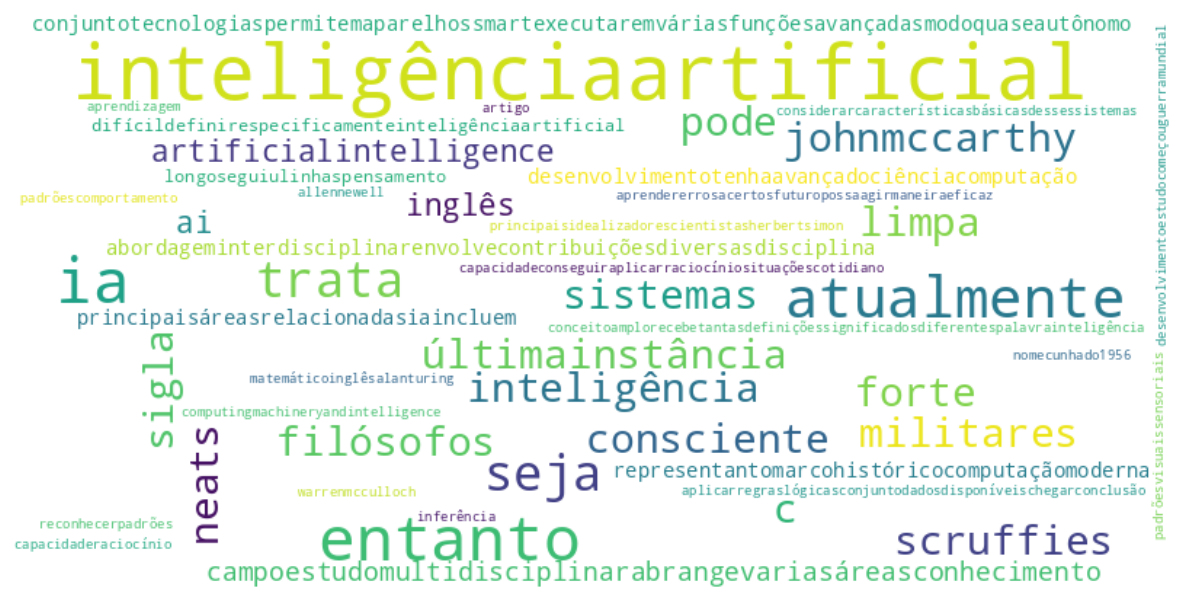

In [ ]:
import matplotlib.pyplot as plt
cloud = cloud.generate(''.join(sem_stop))
plt.figure(figsize=(15,10))
plt.imshow(cloud, interpolation='bilinear', cmap='cividis')
plt.axis('off')

##Classificalção de textos com spaCy

In [ ]:
!pip install spacy

In [ ]:
!python3 -m spacy download pt

In [ ]:
import spacy
spacy.__version__

'3.7.4'

In [ ]:
import pandas as pd
import string
import random
import seaborn as sns
import numpy as np

In [ ]:
base_dados = pd.read_csv('/content/drive/MyDrive/Machine Learning/Udemy/Bases de dados/base_treinamento.txt', encoding = 'utf-8')

In [ ]:
base_dados.head()

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria


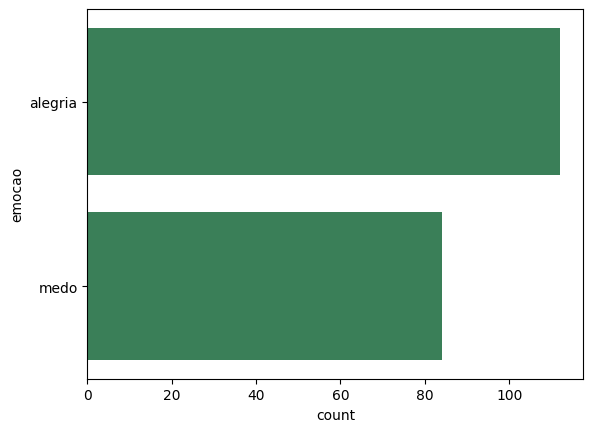

In [ ]:
sns.countplot(base_dados['emocao'], label = 'Contagem', color = 'seagreen');

##Função para pré Processamento dos textos

In [ ]:
pontuacoes = string.punctuation

In [ ]:
#Removendo pontuações
from spacy.lang.pt.stop_words import STOP_WORDS
nlp = spacy.load('pt_core_news_sm')
stop_words = STOP_WORDS

In [ ]:
#Tokenização
def preprocessamento(texto):
  texto = texto.lower()
  documento = nlp(texto)

  lista = []
  for token in documento:
    lista.append(token.lemma_) #lemma_ = extrai o verbo

  #remoção de stop words
  lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in pontuacoes]
  lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()]) #removendo numeros
  return lista

##Limpeza dos textos

In [ ]:
base_dados['texto'] = base_dados['texto'].apply(preprocessamento)
base_dados.head(10)

,texto,emocao
0,trabalho agradável,alegria
1,gosto ficar em o aconchego,alegria
2,fiz adesão a o curso hoje,alegria
3,admirar,alegria
4,adorar,alegria
5,adorar cabelo macio,alegria
6,adorar cor de o olho,alegria
7,somo amável outro,alegria
8,sinto afeição,alegria
9,querer agradar filho,alegria


##Tratamento das classes

In [ ]:
base_dados_final = []
for texto, emocao in zip(base_dados['texto'], base_dados['emocao']):
  if emocao == 'alegria':
    dic = ({'ALEGRIA': True, 'MEDO': False})
  elif emocao == 'medo':
    dic = ({'ALEGRIA': False, 'MEDO': True})

  base_dados_final.append([texto, dic.copy()])

In [ ]:
len(base_dados_final)

196

##Criação do classificador


In [ ]:
from spacy.training import Example

In [ ]:
model = spacy.blank('pt')
textcat = model.add_pipe("textcat")
textcat.add_label("ALEGRIA")
textcat.add_label("MEDO")
history = []

In [ ]:
model.begin_training()
for epoca in range(1000):
  random.shuffle(base_dados_final)
  losses = {}
  for batch in spacy.util.minibatch(base_dados_final, 30): #nas epocas o treinamento sera feito de 30 em 30
    textos = [model(texto) for texto, entities in batch]
    annotations = [{'cats': entities} for texto, entities in batch]
    examples = [Example.from_dict(doc, annotations) for doc, annotations in zip(textos, annotations)]
    model.update(examples, losses = losses)
  if epoca % 100 == 0:
    print(losses)
    history.append(losses)

{'textcat': 1.7212617546319962}
{'textcat': 4.5066479194277864e-11}
{'textcat': 4.44770906031771e-12}
{'textcat': 1.1612806866839222e-12}
{'textcat': 4.1742337600239425e-13}
{'textcat': 1.7256601980301977e-13}
{'textcat': 8.124191787988139e-14}
{'textcat': 4.0372318982779534e-14}
{'textcat': 1.8614147232932248e-14}
{'textcat': 9.054369965800954e-15}


In [ ]:
history_loss = []
for i in history:
  history_loss.append(i.get('textcat'))

In [ ]:
history_loss = np.array(history_loss)
history_loss

array([1.72126175e+00, 4.50664792e-11, 4.44770906e-12, 1.16128069e-12,
       4.17423376e-13, 1.72566020e-13, 8.12419179e-14, 4.03723190e-14,
       1.86141472e-14, 9.05436997e-15])

Text(0, 0.5, 'Erro')

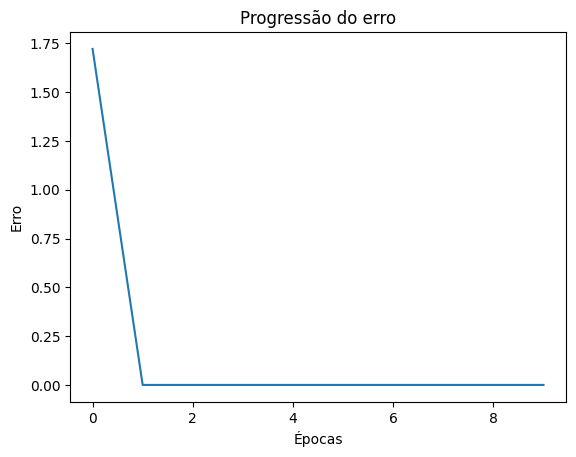

In [ ]:
plt.plot(history_loss)
plt.title('Progressão do erro')
plt.xlabel("Épocas")
plt.ylabel("Erro")

In [ ]:
model.to_disk('model')

##Teste com uma frase

In [ ]:
loaded_model = spacy.load("model")
loaded_model

In [ ]:
text_positiv = 'Eu adoro a cor do seus olhos'

In [ ]:
previsao = preprocessamento(text_positiv)
previsao

'adorar cor de o olho'

In [ ]:
previsao = loaded_model(text_positiv)
previsao

Eu adoro a cor do seus olhos

In [ ]:
previsao.cats

{'ALEGRIA': 0.9537783265113831, 'MEDO': 0.04622170329093933}

In [ ]:
text_negative = 'Estou com medo do Coringa'

In [ ]:
prev_neg = loaded_model(text_negative)
prev_neg.cats

{'ALEGRIA': 0.000995063572190702, 'MEDO': 0.9990049004554749}

##Avaliação do modelo

In [ ]:
previsoes = []
for texto in base_dados['texto']:
  previsao = loaded_model(texto)
  previsoes.append(previsao.cats)

In [ ]:
previsoes

[{'ALEGRIA': 1.0, 'MEDO': 1.1997089544024675e-08},
 {'ALEGRIA': 1.0, 'MEDO': 2.5688988714023253e-08},
 {'ALEGRIA': 1.0, 'MEDO': 1.340456812215507e-08},
 {'ALEGRIA': 1.0, 'MEDO': 1.5518697438210438e-08},
 {'ALEGRIA': 1.0, 'MEDO': 3.6606651043769034e-09},
 {'ALEGRIA': 1.0, 'MEDO': 2.258603259974734e-08},
 {'ALEGRIA': 1.0, 'MEDO': 3.5146317856060705e-08},
 {'ALEGRIA': 1.0, 'MEDO': 3.90858012622175e-08},
 {'ALEGRIA': 1.0, 'MEDO': 8.97778207331612e-09},
 {'ALEGRIA': 1.0, 'MEDO': 1.9750979518562417e-08},
 {'ALEGRIA': 1.0, 'MEDO': 1.5388240015568044e-08},
 {'ALEGRIA': 1.0, 'MEDO': 4.820570609354036e-09},
 {'ALEGRIA': 1.0, 'MEDO': 5.490615073711069e-09},
 {'ALEGRIA': 1.0, 'MEDO': 3.622864674923676e-09},
 {'ALEGRIA': 0.9999998807907104, 'MEDO': 8.766922121594689e-08},
 {'ALEGRIA': 1.0, 'MEDO': 2.0126478261772718e-08},
 {'ALEGRIA': 1.0, 'MEDO': 1.4476084331249695e-08},
 {'ALEGRIA': 1.0, 'MEDO': 1.0522248850008964e-08},
 {'ALEGRIA': 1.0, 'MEDO': 1.3019191946739284e-08},
 {'ALEGRIA': 1.0, 'MEDO': 

In [ ]:
previsoes_finais = []
for previsao in previsoes:
  if previsao['ALEGRIA'] > previsao['MEDO']:
    previsoes_finais.append('alegria')
  else:
    previsoes_finais.append('medo')

previsoes_finais = np.array(previsoes_finais)

In [ ]:
respostas_reais = base_dados['emocao'].values

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(respostas_reais, previsoes_finais)

1.0

In [ ]:
cm = confusion_matrix(respostas_reais, previsoes_finais)
cm

array([[112,   0],
       [  0,  84]])

##Avaliação na base de teste

In [ ]:
base_dados_teste = pd.read_csv('/content/drive/MyDrive/Machine Learning/Udemy/Bases de dados/base_teste.txt', encoding = 'utf-8')

In [ ]:
base_dados_teste['texto'] = base_dados_teste['texto'].apply(preprocessamento)
base_dados_teste.head()

,texto,emocao
0,precisar pagar ingresso,alegria
1,ajeitar ficar,alegria
2,fortunar ultrapassar,alegria
3,afortunar,alegria
4,benéfico Medida,alegria


In [ ]:
previsoes = []
for texto in base_dados_teste['texto']:
  previsao = loaded_model(texto)
  previsoes.append(previsao.cats)

In [ ]:
previsoes_finais = []
for previsao in previsoes:
  if previsao['ALEGRIA'] > previsao['MEDO']:
    previsoes_finais.append('alegria')
  else:
    previsoes_finais.append('medo')

previsoes_final = np.array(previsoes_finais)

In [ ]:
respostas_reais = base_dados_teste['emocao'].values

In [ ]:
accuracy_score(respostas_reais, previsoes_finais)

0.6190476190476191

In [ ]:
cm = confusion_matrix(respostas_reais, previsoes_finais)
cm

array([[38, 10],
       [22, 14]])

##Classificação de textos do X (Twitter)
- Link da base no Kaggle: https://www.kaggle.com/datasets/augustop/portuguese-tweets-for-sentiment-analysis#TweetsNeutralHash.csv

- Negative label = 0
- Positive lavel = 1

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Machine Learning/Udemy/Bases de dados/Twitter/Train50.csv", delimiter = ';')
data.head()

,id,tweet_text,tweet_date,sentiment,query_used
0,1050785521201541121,@Laranjito76 A pessoa certa para isso seria o ...,Fri Oct 12 16:29:25 +0000 2018,1,:)
1,1050785431955140608,"@behin_d_curtain Para mim, é precisamente o co...",Fri Oct 12 16:29:04 +0000 2018,1,:)
2,1050785401248645120,Vou fazer um video hoje... estou pensando em f...,Fri Oct 12 16:28:56 +0000 2018,1,:)
3,1050785370982547461,"aaaaaaaa amei tanto essas polaroids, nem sei e...",Fri Oct 12 16:28:49 +0000 2018,1,:)
4,1050785368902131713,Valoriza o coração do menininho que vc tem. El...,Fri Oct 12 16:28:49 +0000 2018,1,:)


In [ ]:
data.drop(['id', 'tweet_date', 'query_used'], axis =1, inplace = True)

In [ ]:
data.isnull().sum()

tweet_text    0
sentiment     0
dtype: int64

In [ ]:
data_test = pd.read_csv("/content/drive/MyDrive/Machine Learning/Udemy/Bases de dados/Twitter/Test.csv", delimiter = ';')
data_test.head()

,id,tweet_text,tweet_date,sentiment,query_used
0,1029536486021099522,@Gazo1a Nossa! Muito obrigada :),Wed Aug 15 01:13:20 +0000 2018,1,:)
1,1029536496368406528,@BerzGamer vai pa puta que te pariu :),Wed Aug 15 01:13:23 +0000 2018,1,:)
2,1029536531655131137,QUER MAIS DESCONTOS? (14/08) ⭐⭐⭐⭐⭐ 🌐 Confira n...,Wed Aug 15 01:13:31 +0000 2018,1,:)
3,1029536560117678081,"EU VOU PEGAR VCS, ME AJUDEM GALERA, PELO AMOR ...",Wed Aug 15 01:13:38 +0000 2018,1,:)
4,1029536605852377088,Estávamos em casa do Zé e eu estava a morrer d...,Wed Aug 15 01:13:49 +0000 2018,1,:)


In [ ]:
data_test.drop(['id', 'tweet_date', 'query_used'], axis = 1, inplace = True)

In [ ]:
data_test.isnull().sum()

tweet_text    0
sentiment     0
dtype: int64

###Função para pré processamento de textos
- Letras minúsculas
- Nome do usuário
- Espaços em branco
- Emojis
- Stop words
- Lematização
- Pontuações

In [ ]:
import en_core_web_sm
nlp = en_core_web_sm.load()
nlp

In [ ]:
stop_words = spacy.lang.pt.stop_words.STOP_WORDS

In [ ]:
import re

In [ ]:
def preprocessamento(texto):
  # Letras minúsculas
  texto = texto.lower()

  # Nome do usuário
  texto = re.sub(r"@[A-Za-z0-9$-_@.&+]+", ' ', texto) #removendo caracteres especiais

  # URLs
  texto = re.sub(r"https?://[A-Za-z0-9./]+", ' ', texto)

  # Espaços em branco
  texto = re.sub(r" +", ' ', texto)

  # Emojis
  lista_emocoes = {':)': 'emocaopositiva', #trocando emojis por emoções
                   ':d': 'emocaopositiva',
                   ':(': 'emocaonegativa'}
  for emocao in lista_emocoes:
    texto = texto.replace(emocao, lista_emocoes[emocao])

  # Lematização
  documento = nlp(texto)

  lista = []
  for token in documento:
    lista.append(token.lemma_)

  # Removendo Stop words e pontuações
  lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in string.punctuation]
  lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()]) #transformando para string

  return lista

##Pré processamento da base de dados

###Limpeza dos textos aplicando a função preprocessamento

In [ ]:
data['tweet_text'] = data['tweet_text'].apply(preprocessamento)
data.head()

,tweet_text,sentiment
0,pessoa certa vale azevedo emocaopositiva,1
1,mim precisamente contrário emocaopositiva ch...,1
2,vou video hoje ... pensando falar meta csgo pa...,1
3,aaaaaaaa amei polaroid expressar to apaixonada...,1
4,valoriza coração menininho vc diferente faça s...,1


In [ ]:
data_test['tweet_text'] = data_test['tweet_text'].apply(preprocessamento)
data_test.head()

,tweet_text,sentiment
0,emocaopositiva,1
1,pa puta pariu emocaopositiva,1
2,desconto 14/08 ⭐ ⭐ ⭐ ⭐ ⭐ 🌐 confira link ➔ » co...,1
3,vou vcs I ajudem galera amor butera emocaoposi...,1
4,estávamos casa zé morrer sono chego casa fico ...,1


###Treinamento da classe

In [ ]:
#aplicando para o formato que o spacy aceita
final_data = []
for texto, emocao in zip(data['tweet_text'], data['sentiment']):
  if emocao == 1:
    dic = ({'POSITIVO': True, 'NEGATIVO': False})
  elif emocao == 0:
    dic = ({'POSITIVO': False, 'NEGATIVO': True})
  final_data.append([texto, dic.copy()])

In [ ]:
final_data[45000:45005]

[['menino pijama listrado filme triste mundo estrutura pra assistir rever to pensando nisso emocaonegativa',
  {'POSITIVO': False, 'NEGATIVO': True}],
 ['pra ido vídeo luísa raiz poliana infelizmente twitter tá ruim amanhã tento postar emocaonegativa asaventurasdepoliana099',
  {'POSITIVO': False, 'NEGATIVO': True}],
 ['to crise abstinência stranger emocaonegativa — tbm :/ to tentando',
  {'POSITIVO': False, 'NEGATIVO': True}],
 ['  tinha esquecido olhar pra pagar mensalidade turma pro curso emocaonegativa',
  {'POSITIVO': False, 'NEGATIVO': True}],
 ['comer doce comi monte hoje emocaonegativa maldição',
  {'POSITIVO': False, 'NEGATIVO': True}]]

##Criando classificador

In [ ]:
model = spacy.blank('pt')
category = model.add_pipe('textcat')
category.add_label("POSITIVO")
category.add_label("NEGATIVO")
history = []

In [ ]:
model.begin_training()
for epoca in range(5):
  random.shuffle(final_data)
  losses = {}
  for batch in spacy.util.minibatch(final_data, 512):
    textos = [model(texto) for texto, entities in batch]
    annotations = [{'cats': entities} for texto, entities in batch]
    examples = [Example.from_dict(doc, annotation) for doc, annotation in zip(
        textos, annotations
      )]
    model.update(examples, losses=losses)
    history.append(losses)
  if epoca % 5 == 0:
    print(losses)

{'textcat': 1.8611465022945168}


In [ ]:
history_loss = []
for i in history:
  history_loss.append(i.get('textcat'))

In [ ]:
history_loss = np.array(history_loss)
history_loss

array([1.86114650e+00, 1.86114650e+00, 1.86114650e+00, 1.86114650e+00,
       1.86114650e+00, 1.86114650e+00, 1.86114650e+00, 1.86114650e+00,
       1.86114650e+00, 1.86114650e+00, 1.86114650e+00, 1.86114650e+00,
       1.86114650e+00, 1.86114650e+00, 1.86114650e+00, 1.86114650e+00,
       1.86114650e+00, 1.86114650e+00, 1.86114650e+00, 1.86114650e+00,
       1.86114650e+00, 1.86114650e+00, 1.86114650e+00, 1.86114650e+00,
       1.86114650e+00, 1.86114650e+00, 1.86114650e+00, 1.86114650e+00,
       1.86114650e+00, 1.86114650e+00, 1.86114650e+00, 1.86114650e+00,
       1.86114650e+00, 1.86114650e+00, 1.86114650e+00, 1.86114650e+00,
       1.86114650e+00, 1.86114650e+00, 1.86114650e+00, 1.86114650e+00,
       1.86114650e+00, 1.86114650e+00, 1.86114650e+00, 1.86114650e+00,
       1.86114650e+00, 1.86114650e+00, 1.86114650e+00, 1.86114650e+00,
       1.86114650e+00, 1.86114650e+00, 1.86114650e+00, 1.86114650e+00,
       1.86114650e+00, 1.86114650e+00, 1.86114650e+00, 1.86114650e+00,
      

Text(0, 0.5, 'Erro')

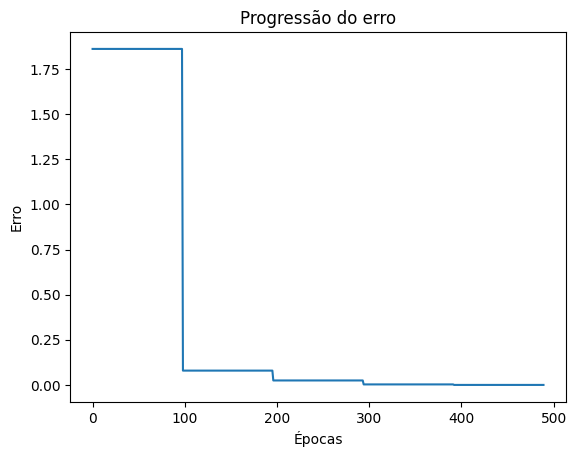

In [ ]:
plt.plot(history_loss)
plt.title('Progressão do erro')
plt.xlabel("Épocas")
plt.ylabel("Erro")

##Teste com uma frase
###Texto positivo

In [ ]:
model.to_disk('model')

In [ ]:
loaded_model = spacy.load('model')
loaded_model

In [ ]:
positive_text = data_test['tweet_text'][21] #indice de uma frase aleatoria
positive_text

'  fico feliz sabendo q recíproco emocaopositiva'

In [ ]:
previsao = loaded_model(positive_text)
previsao

  fico feliz sabendo q recíproco emocaopositiva

In [ ]:
previsao.cats

{'POSITIVO': 0.9999998807907104, 'NEGATIVO': 9.513608745237434e-08}

In [ ]:
texto_positivo = 'eu gosto muito de você'
texto_positivo = preprocessamento(texto_positivo)
texto_positivo

'gosto'

In [ ]:
loaded_model(texto_positivo).cats

{'POSITIVO': 0.9992953538894653, 'NEGATIVO': 0.0007046032696962357}

###Texto negativo

In [ ]:
data_test['tweet_text'][4000]

'tô triste filme mulan mushu emocaonegativa'

In [ ]:
negative_text = data_test['tweet_text'][4000]
previsao = loaded_model(negative_text)
previsao.cats

{'POSITIVO': 1.3131768561436274e-08, 'NEGATIVO': 1.0}

##Avaliação do modelo

In [ ]:
previsoes = []
for texto in data_test['tweet_text']:
  previsao = loaded_model(texto)
  previsoes.append(previsao.cats)

In [ ]:
previsoes_final = []
for previsao in previsoes:
  if previsao['POSITIVO'] > previsao['NEGATIVO']:
    previsoes_final.append(1)
  else:
    previsoes_final.append(0)

previsoes_final = np.array(previsoes_final)

In [ ]:
respostas_reais = data_test['sentiment'].values

In [ ]:
accuracy_score(respostas_reais, previsoes_final)

0.9972

<Axes: >

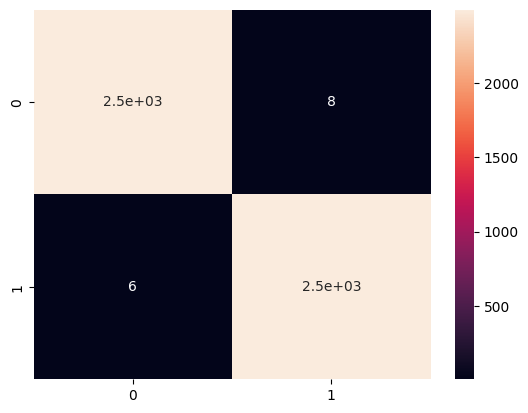

In [ ]:
cm = confusion_matrix(respostas_reais, previsoes_final)
sns.heatmap(cm, annot = True)